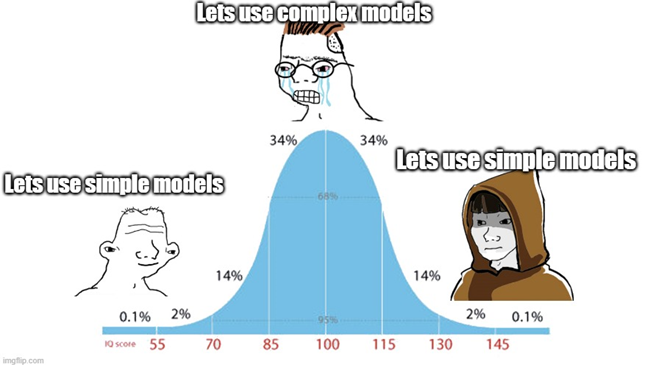

**Аффтар:** Матвей

**Цель:** Встроить разные scalings в pipeline и посмотреть их эффект

**Библиотеки** : `Sklearn`

In [36]:
import numpy as np
import pandas as pd
import sklearn 
import sklearn.preprocessing

In [33]:
X_train = pd.read_parquet('../datasets/01_german/samples/X_train.parquet')
y_train = pd.read_parquet('../datasets/01_german/samples/y_train.parquet').target

# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

X_test  = pd.read_parquet('../datasets/01_german/samples/X_test.parquet')
y_test  = pd.read_parquet('../datasets/01_german/samples/y_test.parquet').target

In [34]:
#Будем здесь использовать только количественные переменные, чтобы не перегружать pipeline onehot ecoding и др
X_train = X_train[['dur_t', 'cred_amt', 'inst_to_income', 'residence_t', 'age', 'n_loans', 'n_depend']]
X_test = X_test[['dur_t', 'cred_amt', 'inst_to_income', 'residence_t', 'age', 'n_loans', 'n_depend']]

## [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
Самый популярный scaling - вычитаем среднее и делим на отклоенение $z = \frac{(x-\mu)}{\sigma}$ (поэтому иногда зовется z преобразованием). Такая стандартизация датасета - это распостарненное требование для многих ML моделей - особенно к ней чувствительны алгоритмы кластеризации


In [35]:
StScal = sklearn.preprocessing.StandardScaler()

StScal.fit(X_train)
pd.DataFrame(StScal.transform(X_train))

,0,1,2,3,4,5,6
0,3.297082,1.199912,0.031196,1.044509,2.406187,1.017777,-0.409736
1,-0.008051,-0.359630,-0.860109,-1.671440,-0.224364,-0.710931,-0.409736
2,-1.279256,-0.733547,-0.860109,1.044509,1.266282,-0.710931,-0.409736
3,-0.008051,0.567050,-1.751413,1.044509,-0.575104,1.017777,-0.409736
4,-0.770774,-0.854388,0.922500,-0.766124,-1.276585,-0.710931,-0.409736
...,...,...,...,...,...,...,...
795,-0.262292,1.069404,-0.860109,1.044509,0.301746,1.017777,2.440599
796,-0.262292,-0.241206,0.922500,0.139192,-0.312049,-0.710931,-0.409736
797,0.246190,0.843603,0.922500,-0.766124,-0.750474,1.017777,-0.409736
798,-0.770774,-0.647923,-0.860109,-1.671440,-0.925844,-0.710931,-0.409736


## [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)
Другой популярный scaling: $z = \frac{x - min}{ (max - min)}$ Его плюс в том, что все наблюдения теперь от 0 до 1. Минус в том, что чересчур чувствителен к outliers

In [11]:
MMScal = sklearn.preprocessing.MinMaxScaler()

MMScal.fit(df)
pd.DataFrame(MMScal.transform(df))

,0,1,2,3,4,5,6
0,1.000000,0.362386,0.666667,1.000000,0.785714,0.333333,0.0
1,0.303571,0.113844,0.333333,0.000000,0.250000,0.000000,0.0
2,0.035714,0.054253,0.333333,1.000000,0.553571,0.000000,0.0
3,0.303571,0.261527,0.000000,1.000000,0.178571,0.333333,0.0
4,0.142857,0.034995,1.000000,0.333333,0.035714,0.000000,0.0
...,...,...,...,...,...,...,...
795,0.250000,0.341587,0.333333,1.000000,0.357143,0.333333,1.0
796,0.250000,0.132717,1.000000,0.666667,0.232143,0.000000,0.0
797,0.357143,0.305601,1.000000,0.333333,0.142857,0.333333,0.0
798,0.142857,0.067899,0.333333,0.000000,0.107143,0.000000,0.0


## [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)
Scaling, наиболее чувствительный к outliers: вычитаем медиану и делим на IQR: $z = \frac{(x - median)}{IQR}$

In [12]:
RobScal = sklearn.preprocessing.RobustScaler()

RobScal.fit(df)
pd.DataFrame(RobScal.transform(df))

,0,1,2,3,4,5,6
0,3.50,1.622995,0.0,0.5,2.000000,1.0,0.0
1,0.25,-0.005046,-0.5,-1.0,0.000000,0.0,0.0
2,-1.00,-0.395387,-0.5,0.5,1.133333,0.0,0.0
3,0.25,0.962336,-1.0,0.5,-0.266667,1.0,0.0
4,-0.50,-0.521535,0.5,-0.5,-0.800000,0.0,0.0
...,...,...,...,...,...,...,...
795,0.00,1.486754,-0.5,0.5,0.400000,1.0,1.0
796,0.00,0.118580,0.5,0.0,-0.066667,0.0,0.0
797,0.50,1.251036,0.5,-0.5,-0.400000,1.0,0.0
798,-0.50,-0.306001,-0.5,-1.0,-0.533333,0.0,0.0


# Встраивание в pipeline

In [20]:
#Подготовка
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score


def Gini(y, y_pred):
    res = roc_auc_score(y, y_pred) * 2 - 1
    print(f"Gini: {res}")
    return(res)

In [38]:
seed = 42
lgbm_mdl = LGBMClassifier(
    num_leaves = 10,
    learning_rate = .1,
    reg_alpha = 8,
    reg_lambda = 8,
    random_state = seed
)
StScal_mdl = sklearn.preprocessing.StandardScaler()
MMScal_mdl = sklearn.preprocessing.MinMaxScaler()
RobScal_mdl = sklearn.preprocessing.RobustScaler()



print('Без scaling')
mdl_pipe_impute = Pipeline(
    [ ('lgbm', lgbm_mdl)]
)
mdl_pipe_impute.fit(X_train, y_train)

Gini(y_train, mdl_pipe_impute.predict_proba(X_train)[:, 1])
Gini(y_test, mdl_pipe_impute.predict_proba(X_test)[:, 1])



print('Standard scaling')
mdl_pipe_impute = Pipeline(
    [('StScal', StScal_mdl), ('lgbm', lgbm_mdl)]
)
mdl_pipe_impute.fit(X_train, y_train)

Gini(y_train, mdl_pipe_impute.predict_proba(X_train)[:, 1])
Gini(y_test, mdl_pipe_impute.predict_proba(X_test)[:, 1])



print('MinMax scaling')
mdl_pipe_impute = Pipeline(
    [('MMScal', MMScal_mdl), ('lgbm', lgbm_mdl)]
)
mdl_pipe_impute.fit(X_train, y_train)

Gini(y_train, mdl_pipe_impute.predict_proba(X_train)[:, 1])
Gini(y_test, mdl_pipe_impute.predict_proba(X_test)[:, 1])



print('Robust scaling')
mdl_pipe_impute = Pipeline(
    [('RobScal', RobScal_mdl), ('lgbm', lgbm_mdl)]
)
mdl_pipe_impute.fit(X_train, y_train)

Gini(y_train, mdl_pipe_impute.predict_proba(X_train)[:, 1])
Gini(y_test, mdl_pipe_impute.predict_proba(X_test)[:, 1])

Без scaling
Gini: 0.47806916619036666
Gini: 0.3020795768722204
Standard scaling
Gini: 0.47505548586316704
Gini: 0.311095083543695
MinMax scaling
Gini: 0.480162412131919
Gini: 0.30869094843130185
Robust scaling
Gini: 0.4761169545498407
Gini: 0.31169611732179336


0.31169611732179336

# Выводы
1. Все scaling вставляются без проблем в pipeline: ничего дополнительного не требуется
1. Как видим, все виды scaling показали небольшой прирост на тестовой выборке
1. Наиболее эффективным оказался robust, самым неэффективным minmax, что свидетельствует о присутствии outliers в выборке